In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.read_csv("Data_set.csv")
df= df.iloc[:,1:]

# df.iloc[:,0:97]=df.iloc[:,0:97].abs()
df.head()

,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,...,z92,z93,z94,z95,z96,z97,start_point,end_point,isIntrusion,intrusion_zone
0,3.479755e-11,1.729669e-06,-1.074505e-06,1.696733e-06,1.408154e-06,-1.247660e-06,4.392523e-07,-1.822577e-07,-1.978193e-06,-4.215552e-08,...,4.510038e-07,4.933022e-08,-1.209462e-06,8.495825e-08,-1.360888e-07,-8.673617e-19,0.009132,40.904136,0.0,0.0
1,-5.774669e-10,-9.667019e-07,-1.172746e-06,-8.148441e-07,-1.085682e-06,-2.618001e-08,1.536875e-06,-4.809667e-07,7.355430e-08,1.620232e-06,...,-2.559091e-07,9.168085e-07,8.087109e-07,7.078943e-07,4.946341e-07,-6.505213e-19,41.005079,81.806418,0.0,0.0
2,7.974670e-10,5.440602e-07,5.968525e-07,-2.136242e-08,-2.463316e-07,4.842712e-07,-8.860241e-07,6.470653e-07,5.430934e-07,-1.458603e-06,...,-1.413626e-06,1.379344e-07,-3.167636e-07,-5.100911e-07,-4.025520e-07,1.301043e-18,81.912590,122.817894,0.0,0.0
3,-2.959882e-10,3.390513e-07,2.861875e-07,1.237342e-06,1.548561e-06,-4.017564e-07,-7.252355e-07,-5.407646e-07,-1.974723e-08,-8.548541e-07,...,2.269420e-06,3.904686e-07,-5.901801e-07,9.370105e-07,1.087443e-07,-3.373336e-09,122.893114,163.760757,0.0,0.0
4,1.426321e-10,-8.383938e-07,-8.720060e-08,-1.354042e-06,-1.309397e-06,9.558595e-07,9.235621e-07,1.726365e-06,1.359531e-07,-4.867452e-07,...,-2.116315e-06,-1.872924e-06,3.991558e-07,-2.448489e-07,2.474903e-07,3.373336e-09,163.940041,204.690356,0.0,0.0


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU,Conv1D,Flatten,MaxPooling1D
from keras.optimizers import Adam

In [3]:
x=df.iloc[:, 0:97]
x.shape
x=np.asarray(x)
x = x.reshape(1000, 1,97)

In [4]:


model = Sequential()
# model.add(Conv1D(90, kernel_size=5, strides=10,input_shape=(None,97),kernel_initializer= 'uniform',))
model.add(Conv1D(90, kernel_size=1,input_shape=(1,97)))
model.add(LeakyReLU())
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(45, kernel_size=1))
model.add(LeakyReLU())
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(25, kernel_size=1))
model.add(LeakyReLU())
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(45, kernel_size=1))
model.add(LeakyReLU())
model.add(MaxPooling1D(pool_size=1))

model.add(Conv1D(90, kernel_size=1))
model.add(LeakyReLU())
model.add(Flatten())
model.add(Dense(97,activation="sigmoid"))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 90)             8820      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1, 90)             0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 90)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 45)             4095      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 45)             0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 45)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 25)             1

In [5]:
model.compile(optimizer='adam',loss='mae')  # mae --> mse

In [6]:
x.shape

(1000, 1, 97)

In [7]:

model.fit(x,x,batch_size=1,epochs=20)

Epoch 1/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0163
Epoch 2/20
1000/1000 [==============================] - 1s 1ms/step - loss: 5.3306e-06
Epoch 3/20
1000/1000 [==============================] - 1s 1ms/step - loss: 4.9858e-06
Epoch 4/20
1000/1000 [==============================] - 1s 1ms/step - loss: 4.8879e-06
Epoch 5/20
1000/1000 [==============================] - 1s 1ms/step - loss: 4.8535e-06
Epoch 6/20
1000/1000 [==============================] - 1s 1ms/step - loss: 4.8392e-06
Epoch 7/20
1000/1000 [==============================] - 1s 1ms/step - loss: 4.8326e-06
Epoch 8/20
1000/1000 [==============================] - ETA: 0s - loss: 4.8080e-0 - 1s 1ms/step - loss: 4.8292e-06
Epoch 9/20
1000/1000 [==============================] - 1s 1ms/step - loss: 4.8274e-06
Epoch 10/20
1000/1000 [==============================] - 1s 1ms/step - loss: 4.8263e-06
Epoch 11/20
1000/1000 [==============================] - 1s 1ms/step - loss: 4.8257e-06
Epoch 12/20
1000/

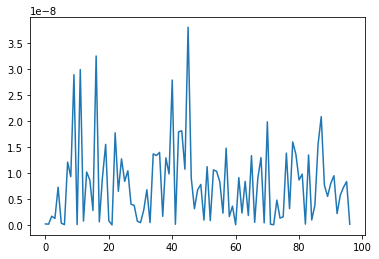

In [10]:
pred =model.predict(x)

plt.plot(pred[5])
plt.show()
  

In [11]:
pred= model.predict(x)


(1000, 97)


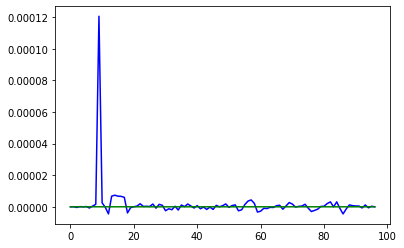

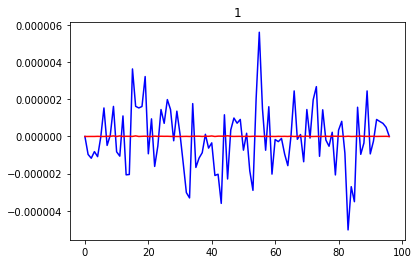

In [12]:
pred= model.predict(x)
print(pred.shape)

pred[1]
plt.plot(x[124][0],'b')
plt.plot(pred[124],"g")
plt.show()
a=1
for i in pred:
#     plt.plot(i)
    plt.title(f"{a}")
    a+=1
    plt.plot(x[a-1][0],'b')
    plt.plot(i,"r")
    plt.show()
    break

NameError: name 'y' is not defined

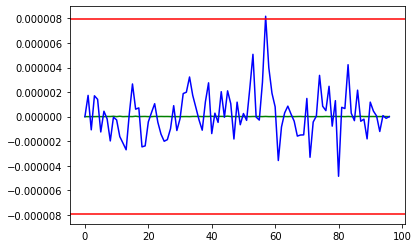

In [15]:
 for index in range(len(pred)):
    list1= list(pred[index])
    list2=list(x[index][0])
    ans=[]

    los= keras.losses.mae(list1,list2) 
    for i in range(97):
        ans.append(abs(list1[i]-list2[i]))
    mean=np.mean(ans)
    std=np.std(ans)
#     print(los,mean,std)
    ans_point=-1
    for d in range(97):
        if list2[d]>mean+2*std:
            ans=d+1;
    plt.plot(list1,"g")
    plt.plot(list2,"b")

    plt.axhline(y=mean+5*std, color='r', linestyle='-')
    plt.axhline(y=-(mean+5*std), color='r', linestyle='-')
    plt.title(f"{index} zone {ans_point}   real ans {y[index]}")

            
    plt.show()
    break


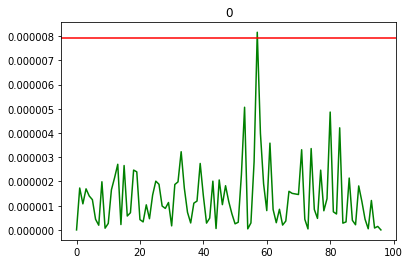

In [14]:
predicted_value=[]
for index in range(len(pred)):
    list1= list(pred[index])
    list2=list(x[index][0])
    los= keras.losses.mae(list1,list2) 
    ans=[]
    for i in range(97):
        ans.append(abs(list1[i]-list2[i]))
    mean=np.mean(ans)
    std=np.std(ans)
    temp=[]
    for d in range(97):
        temp.append(abs(list1[d]-list2[d]))
    plt.plot(temp,"g")
    predicted_value.append(temp)

    plt.axhline(y=mean+5*std, color='r', linestyle='-')
    plt.title(f"{index}")

            
    plt.show()
    break

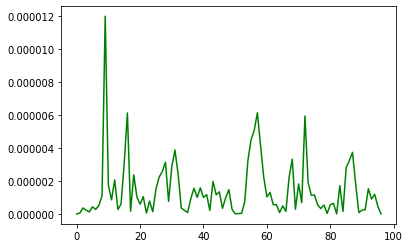

In [17]:
plt.plot(predicted_value[102],color="g")

In [109]:
ans=[0 for x in range(1000)]
thresh= mean+5*std
for i in range(1000):
    for j in range(97):
        if predicted_value[i][j]>thresh:
            if(ans[i]==0):
                ans[i]=j+1
    

In [111]:
correct=0
for i in range(750,950):
    if ans[i]==df.iloc[i,100]:
        correct+=1
    
print(correct,correct/2)   


187 93.5


## accuracy = 93.5 %
 187 cases out of 200 cases are predicted acurately